In [1]:
import anndata as ad
import ACTIONet as anet

In [2]:
%load_ext autoreload
%autoreload 2
%aimport ACTIONet

In [3]:
adata = ad.read_h5ad("../data/pfc5k_ACTIONet_v2_python.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 4505 × 17658
    obs: 'umis', 'genes', 'mito.perc', 'sizeFactors', 'Celltype', 'assigned_archetype', 'node_centrality'
    uns: 'ACTION', '__annotations___colors', 'metadata', 'obsm_annot', 'varm_annot'
    obsm: 'ACTION', 'ACTION_B', 'ACTION_normalized', 'ACTIONet2D', 'ACTIONet3D', 'ACTIONred', 'C_stacked', 'C_unified', 'H_stacked', 'H_unified', 'archetype_footprint', 'denovo_color'
    varm: 'ACTION_A', 'ACTION_V', 'unified_feature_profile', 'unified_feature_specificity'
    obsp: 'ACTIONet'

In [5]:
anet.po.cells.cluster(adata)

In [6]:
adata

AnnData object with n_obs × n_vars = 4505 × 17658
    obs: 'umis', 'genes', 'mito.perc', 'sizeFactors', 'Celltype', 'assigned_archetype', 'node_centrality', 'leiden'
    uns: 'ACTION', '__annotations___colors', 'metadata', 'obsm_annot', 'varm_annot'
    obsm: 'ACTION', 'ACTION_B', 'ACTION_normalized', 'ACTIONet2D', 'ACTIONet3D', 'ACTIONred', 'C_stacked', 'C_unified', 'H_stacked', 'H_unified', 'archetype_footprint', 'denovo_color'
    varm: 'ACTION_A', 'ACTION_V', 'unified_feature_profile', 'unified_feature_specificity', 'leiden_feature_specificity'
    obsp: 'ACTIONet'

<AxesSubplot:title={'center':'__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

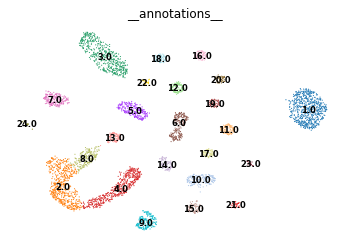

In [7]:
anet.pl.plot_ACTIONet(adata, "leiden")

In [8]:
adata.varm["leiden_feature_specificity"].shape

(17658, 24)

In [9]:
import json
import itertools

f = open('../markers.json')
 
all_markers = json.load(f)

markers = all_markers["Brain"]["PFC"]["Mohammadi2020"]["marker.genes"]

In [10]:
Labels, Conf, Enrichment = anet.po.clusters.annotate(adata, labels=adata.obs["Celltype"])

In [11]:
Enrichment

,Ast,Ex-L2,Ex-L23,Ex-L3,Ex-L4_MYLK,Ex-L45_LRRK1,Ex-L45_MET,Ex-L56,Ex-L56_CC_NTNG2,Ex-L5b_HTR2C,...,In-PV_Chandelier,In-Reelin,In-Rosehip_CHST9,In-Rosehip_TRPC3,In-SST,In-VIP,Mic,Oli,OPC,Pericytes
11.0,3.405582,-0.667258,-0.688568,-0.667258,-0.688568,-0.667258,-0.667258,-0.688568,-0.688568,-0.709878,...,-0.688568,-0.709878,-0.709878,-0.688568,-0.667258,-0.688568,-0.688568,-0.688568,-0.688568,-0.688568
4.0,0.111224,22.530813,0.799009,0.187077,0.262929,-0.040481,0.035371,0.111224,0.111224,0.187077,...,0.262929,-0.040481,0.262929,0.035371,0.035371,0.338782,0.262929,-0.419745,0.035371,0.262929
2.0,0.141076,-0.102929,23.893405,2.217638,-0.184264,-0.672273,-0.021594,-0.102929,0.141076,0.059741,...,0.141076,0.141076,-0.021594,0.141076,0.222411,0.059741,0.141076,-0.672273,-0.021594,0.059741
8.0,-0.697275,-0.730588,-0.830526,5.211136,-0.730588,-0.697275,-0.730588,-0.697275,-0.730588,-0.697275,...,-0.730588,-0.697275,-0.697275,-0.730588,-0.797213,-0.697275,-0.697275,-0.863838,-0.730588,-0.697275
13.0,-0.731660,-0.731660,-0.696954,-0.714307,2.458317,-0.696954,-0.714307,-0.731660,-0.731660,-0.731660,...,-0.731660,-0.714307,-0.731660,-0.731660,-0.731660,-0.714307,-0.731660,-0.731660,-0.731660,-0.731660
3.0,-0.781591,-1.237237,-1.541001,-0.933473,-0.857532,34.613312,-0.857532,-1.085355,-0.857532,-0.781591,...,-1.009414,-0.857532,-0.933473,-0.857532,-1.085355,-1.009414,-0.933473,-1.161296,-0.781591,-0.933473
7.0,-0.778979,-0.706337,-0.815300,-0.742658,-0.778979,-0.778979,8.315611,-0.778979,-0.778979,-0.778979,...,-0.778979,-0.778979,-0.778979,-0.778979,-0.815300,-0.778979,-0.778979,-0.742658,-0.778979,-0.778979
18.0,-0.683859,-0.683859,-0.683859,-0.683859,-0.683859,-0.695017,-0.683859,1.459370,-0.683859,-0.683859,...,-0.683859,-0.683859,-0.695017,-0.683859,-0.683859,-0.683859,-0.683859,-0.683859,-0.683859,-0.683859
20.0,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,1.151918,-0.692983,...,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983,-0.692983
19.0,-0.698303,-0.688275,-0.688275,-0.688275,-0.688275,-0.688275,-0.688275,-0.688275,-0.688275,1.314992,...,-0.688275,-0.688275,-0.688275,-0.688275,-0.688275,-0.688275,-0.688275,-0.698303,-0.688275,-0.688275


<AxesSubplot:title={'center':'__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

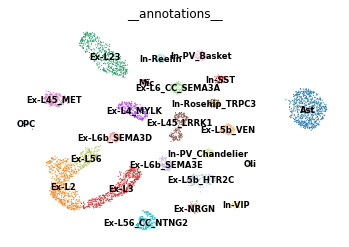

In [13]:
anet.pl.plot_ACTIONet(adata, Labels[adata.obs["leiden"]].values)

In [14]:
Labels_markers, Conf_markers, Enrichment_markers = anet.po.clusters.annotate(adata, markers=markers)

In [15]:
Enrichment_markers

,Ast,Endo,Ex-L2/3,Ex-L4,Ex-L4/5,Ex-L5,Ex-L5/6,Ex-L5/6-CC,Ex-NRGN,In-PV (Basket),In-PV (Chandelier),In-Rosehip,In-SST,In-VIP,Mic,Oli,OPC
1,15.394150,4.209130,0.000000,0.000000,0.000000,0.000000,0.138248,0.000000,2.511525,0.054824,2.158547,2.597149,0.006517,1.924222,5.757794,144.933974,26.585292
2,1.981659,1.140250,22.516059,5.571321,0.831420,1.175309,0.368822,4.701631,0.000000,0.629160,0.210574,0.443293,0.000000,0.000000,0.000000,0.000000,1.735295
3,0.370223,1.633729,1.820932,19.738515,39.382365,13.829256,15.654666,6.352026,4.207010,3.087833,2.190240,4.773742,0.847272,1.873857,0.822734,0.000000,0.991724
4,4.474801,0.252299,78.556095,16.425230,4.537984,12.815258,7.231385,9.899469,0.000000,12.687081,14.584775,18.193452,8.436412,13.630423,0.410144,0.000000,5.948685
5,0.156442,0.270274,5.384564,3.760954,3.124410,8.241191,1.984812,13.713701,0.230896,0.227119,0.028215,1.329750,0.626594,0.000000,0.000000,0.000000,1.162391
6,4.656426,2.156005,4.239376,5.747685,2.182432,7.743715,14.581962,0.748563,1.108005,53.604777,36.070912,39.789054,72.894800,31.054122,1.936827,0.385981,15.043948
7,1.209458,1.791160,5.807342,39.193651,10.286569,7.553017,12.336539,4.027887,4.440934,7.519963,6.712472,6.180313,1.935380,5.993167,0.394853,0.000000,2.233264
8,1.256028,1.627801,9.183055,13.040337,4.049723,1.438213,3.351026,1.734042,0.000000,1.482424,1.583867,2.182761,1.604098,0.343471,0.019181,0.000000,2.167136
9,3.281243,3.974210,0.030788,1.024558,1.655498,6.654433,8.717474,0.803986,0.000000,94.672484,55.020872,34.507691,30.365391,23.513955,2.530164,0.000000,9.427539
10,8.733057,0.556252,0.659323,1.947523,1.758424,4.589595,15.189854,1.099076,1.478197,36.672921,37.681461,42.079320,22.580012,84.061016,1.342639,0.025022,16.334163


<AxesSubplot:title={'center':'__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

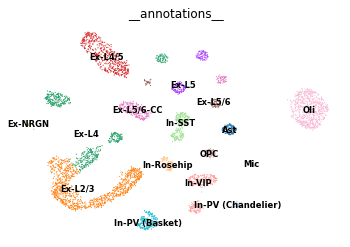

In [16]:
anet.pl.plot_ACTIONet(adata, Labels_markers[adata.obs["leiden"]].values)